# COGS 108 - EDA Checkpoint

# Names

- Vrisan Dubey
- Vikram Venkatesh
- Nilay Menon
- Caleb Galdston
- Liam Manatt

# Research Question

Given a product review’s content, are features generated from sentiment analysis, tf-idf, and bag of words models good predictors of whether or not a review was written by a human or not?


## Background and Prior Work

In today’s internet based world, product reviews, especially the ones online, play a very important role when it comes to consumer purchasing decisions. Such reviews also have a big impact on the reputation of companies selling the products. With reviews being very important, there could be the possibility that people try to game the system by writing fake reviews. The internet has millions if not billions of reviews for products with the number of reviews growing fast everyday.  According to Scott Clark from CMSwire.com, “with the advent of generative AI, fake reviews are becoming more advanced and difficult to detect”.<a name="cite_ref-1"></a>[<sup>1</sup>](#cite_note-1) As this growth of artificial intelligence continues, so does the possibility of fraudulent reviews generated by bots. We know that there is a possibility of having more fake reviews than real reviews more than ever now due to large language models. With such an important problem, we wanted to see if we are able to classify whether a review is written by a human or not.

With such a pressing topic, there have been many attempts to help combat such reviews. For example, according to a study done by Arjun Muherjee and a couple others, “supervised learning was used with a set of review centric features (e.g., unigrams and review length) and reviewer and product centric features (e.g., average rating, sales rank, etc.) to detect fake reviews” (2). The use of features like n grams are important when trying to predict whether or not a review is fake or real. “An AUC (Area Under the ROC Curve) of 0.78 was reported using logistic regression. The assumption, however, is too restricted for detecting generic fake reviews”.<a name="cite_ref-2"></a>[<sup>2</sup>](#cite_note-2) This shows that detecting fake reviews might be a bit harder than we initially thought. 

Another study that went into fake review detection using machine learning methods, states that “fake reviews are differentiated from genuine reviews using four linguistic clues like level of detail, understandability, cognition indicators and writing style”.<a name="cite_ref-3"></a>[<sup>3</sup>](#cite_note-3) Using features like case of letters, things like if a word was a feeling word, and the words part of speech, the people in the study were able to use machine learning algorithms like logistic regression to classify if a review was genuine or not. However, even these researchers found it difficult to reach a high level of accuracy due to things like the fabricated review being very close to what is considered to be a genuine review. 

1. <a name="cite_note-1"></a> [^](#cite_ref-1) Clark, Scott. "How to Spot and Combat Fake Reviews and Bots." *CMSWIRE*, (18 Oct 2023). https://www.cmswire.com/customer-experience/how-to-spot-and-combat-fake-reviews-and-bots/
2. <a name="cite_note-2"></a> [^](#cite_ref-2) Mukherjee, Arjun et al. “Fake Review Detection : Classification and Analysis of Real and Pseudo Reviews.” (2013). https://www2.cs.uh.edu/~arjun/papers/UIC-CS-TR-yelp-spam.pdf
3. <a name="cite_note-3"></a> [^](#cite_ref-3) N. A. Patel and R. Patel, "A Survey on Fake Review Detection using Machine Learning Techniques," *2018 4th International Conference on Computing Communication and Automation (ICCCA)*, Greater Noida, India, (2018). https://ieeexplore.ieee.org/abstract/document/8777594


# Hypothesis


Given text data of a product review, we hypothesize that our model can accurately predict whether a review was written by a human or not. We believe that certain features extracted from the review content, such as sentiment scores, term frequency-inverse document frequency (tf-idf) values, and bag of words representations, will reveal unique, identifiable patterns in human written and automated reviews. By training on a large dataset, we expect our model to learn and use these features to differentiate between human written and generated reviews.

# Data

## Data overview
- Dataset #1
  - Dataset Name: Fake Reviews Dataset
  - Link to the dataset: https://www.kaggle.com/datasets/mexwell/fake-reviews-dataset
  - Number of observations: 40432
  - Number of variables: 4

Our dataset is relatively simple as it just contains only a few features - the text contents of the review (stored as string), the review's rating (ordinal variable between 1 and 5, stored as float), and the review's category (stored as string). The target variable labels the review as either Computer Generated ('CG') or Original Review ('O'G). Our dataset does not have any missing values so most of our data cleaning involves little tasks like making the column names and features more intuitive (for readability purposes). We also have to preprocess the text column to make it usable in our analysis, which includes making the text universally lowercase and removing stopwords and punctuation. However, we will keep the original reviews (with stopwords and punctuation) in case it has some meaning later down in our analysis.

## Fake Reviews Dataset

In [1]:
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('omw-1.4')

stopwords = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to /Users/vikram/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vikram/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/vikram/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [2]:
## YOUR CODE TO LOAD/CLEAN/TIDY/WRANGLE THE DATA GOES HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION 
reviews_df = pd.read_csv('data/fake_reviews.csv')
reviews_df.head()

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...


# Results

## Exploratory Data Analysis

Carry out whatever EDA you need to for your project.  Because every project will be different we can't really give you much of a template at this point. But please make sure you describe the what and why in text here as well as providing interpretation of results and context.

### Section 1 of EDA - Exploring Basic Properties of the Dataset



Import all of the necessary packages to perform our EDA. 

In [3]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import string
from wordcloud import WordCloud
!pip install textblob
from textblob import TextBlob
!pip install textstat
import textstat

!pip install --upgrade Pillow

nltk.download('wordnet')
nltk.download('vader_lexicon')

sns.set_theme()

[nltk_data] Downloading package wordnet to /Users/vikram/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/vikram/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [4]:
reviews_df.dtypes

category     object
rating      float64
label        object
text_        object
dtype: object

Explore the data types in our data set. Rating is the only float value while the rest are objects (strings). 

In [5]:
reviews_df.label.unique()

array(['CG', 'OR'], dtype=object)

There are two unique labels that an entry in our dataset can have, 'CG' or 'OR'. 'CG' represents a computer generated review while 'OR' represents an original (real) review. 

In [6]:
reviews_df.isna().sum()

category    0
rating      0
label       0
text_       0
dtype: int64

Our dataset has no null values : )

In [7]:
reviews_df.category.unique()

array(['Home_and_Kitchen_5', 'Sports_and_Outdoors_5', 'Electronics_5',
       'Movies_and_TV_5', 'Tools_and_Home_Improvement_5',
       'Pet_Supplies_5', 'Kindle_Store_5', 'Books_5', 'Toys_and_Games_5',
       'Clothing_Shoes_and_Jewelry_5'], dtype=object)

These are the categories that a review can fall under.

In [8]:
reviews_df['rating'].unique()

array([5., 1., 3., 2., 4.])

There are five different ratings that a review can have from 1-5. 

In [9]:
group_rating = reviews_df.groupby('label')['rating'].mean()
group_rating

label
CG    4.259893
OR    4.253265
Name: rating, dtype: float64

It seems that the average ratings between fake reviews and real reviews are very similar. 

In [10]:
# Formatting the names of the columns better and changing the ratings column from floats to integers
reviews_df = reviews_df.rename(columns = {'text_': 'text'})
reviews_df['category'] = reviews_df['category'].apply(lambda s: s[:-2].replace('_', ' '))
reviews_df['rating'] = reviews_df['rating'].astype(int)

In [11]:
# add a column with the stop words for each review removed and the punctuation for each review removed
reviews_df['text_no_stop'] = reviews_df['text'].apply(lambda s: ' '.join([token for token in word_tokenize(s.lower()) if token not in stopwords]))
reviews_df['text_no_punct'] = reviews_df['text'].apply(lambda s: s.lower().translate(str.maketrans('', '', string.punctuation)))
reviews_df.head()

,category,rating,label,text,text_no_stop,text_no_punct
0,Home and Kitchen,5,CG,"Love this! Well made, sturdy, and very comfor...","love ! well made , sturdy , comfortable . love...",love this well made sturdy and very comfortab...
1,Home and Kitchen,5,CG,"love it, a great upgrade from the original. I...","love , great upgrade original . 've mine coupl...",love it a great upgrade from the original ive...
2,Home and Kitchen,5,CG,This pillow saved my back. I love the look and...,pillow saved back . love look feel pillow .,this pillow saved my back i love the look and ...
3,Home and Kitchen,1,CG,"Missing information on how to use it, but it i...","missing information use , great product price !",missing information on how to use it but it is...
4,Home and Kitchen,5,CG,Very nice set. Good quality. We have had the s...,nice set . good quality . set two months,very nice set good quality we have had the set...


In [12]:
# Here we tokenize the words, making each word a unit, remove stop words (common words that don't differentiate the text well)
# Next we lemmatize the words, meaning break them down into their root meaning, thus words that come from the same root will be treated as the same
def preprocess_text(s):
    tokens = word_tokenize(s.lower())
    filtered_tokens = [token for token in tokens if token not in stopwords]
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]
    processed_text = ' '.join(lemmatized_tokens)
    return processed_text

In [13]:
# creates a new column called lemma_text that applies the preprocess_text function to the text_no_punct column
reviews_df['lemma_text'] = reviews_df['text_no_punct'].apply(preprocess_text)

Next we add sentiment features to the data

In [14]:
# Assign the negative, positive, neutral, and composite sentiment values to columns
sent_analyzer = SentimentIntensityAnalyzer()
reviews_df['sentiment'] = reviews_df['lemma_text'].apply(lambda s: sent_analyzer.polarity_scores(s))
reviews_df['neg_sentiment'] = reviews_df.sentiment.apply(lambda dc: dc['neg'])
reviews_df['pos_sentiment'] = reviews_df.sentiment.apply(lambda dc: dc['pos'])
reviews_df['neu_sentiment'] = reviews_df.sentiment.apply(lambda dc: dc['neu'])
reviews_df['comp_sentiment'] = reviews_df.sentiment.apply(lambda dc: dc['compound'])

reviews_df.head()

,category,rating,label,text,text_no_stop,text_no_punct,lemma_text,sentiment,neg_sentiment,pos_sentiment,neu_sentiment,comp_sentiment
0,Home and Kitchen,5,CG,"Love this! Well made, sturdy, and very comfor...","love ! well made , sturdy , comfortable . love...",love this well made sturdy and very comfortab...,love well made sturdy comfortable love itvery ...,"{'neg': 0.0, 'neu': 0.15, 'pos': 0.85, 'compou...",0.000,0.850,0.150,0.9517
1,Home and Kitchen,5,CG,"love it, a great upgrade from the original. I...","love , great upgrade original . 've mine coupl...",love it a great upgrade from the original ive...,love great upgrade original ive mine couple year,"{'neg': 0.0, 'neu': 0.321, 'pos': 0.679, 'comp...",0.000,0.679,0.321,0.8910
2,Home and Kitchen,5,CG,This pillow saved my back. I love the look and...,pillow saved back . love look feel pillow .,this pillow saved my back i love the look and ...,pillow saved back love look feel pillow,"{'neg': 0.0, 'neu': 0.417, 'pos': 0.583, 'comp...",0.000,0.583,0.417,0.7906
3,Home and Kitchen,1,CG,"Missing information on how to use it, but it i...","missing information use , great product price !",missing information on how to use it but it is...,missing information use great product price,"{'neg': 0.214, 'neu': 0.388, 'pos': 0.398, 'co...",0.214,0.398,0.388,0.4404
4,Home and Kitchen,5,CG,Very nice set. Good quality. We have had the s...,nice set . good quality . set two months,very nice set good quality we have had the set...,nice set good quality set two month,"{'neg': 0.0, 'neu': 0.467, 'pos': 0.533, 'comp...",0.000,0.533,0.467,0.6908


In [15]:
# adds a column this the number of words in each review without punctuation
reviews_df['num_words'] = reviews_df['text_no_punct'].apply(lambda s: len(s.split(' ')))
# finds the average num of words in reviews grouped by whether the review is computer generated or not
review_len_per_group = reviews_df.groupby('label')['num_words'].mean()
review_len_per_group

label
CG    62.784032
OR    74.321231
Name: num_words, dtype: float64

Based on initial observation, it appears that the computer generated reviews are shorter, on average, than the real reviews. 

#### Amount of punctuation used standardized by number of words between original and computer generated reviews

In [40]:
def count_punc(text):
    count = 0
    for i in text:
        if i in string.punctuation:
            count += 1
    return count

reviews_df['num_punc_stand'] = reviews_df['text'].apply(count_punc) / reviews_df['num_words']
num_punc_per_group = reviews_df.groupby('label')['num_punc_stand'].mean()
num_punc_per_group

label
CG    0.150475
OR    0.160492
Name: num_punc_stand, dtype: float64

Based on initial observation, it appears that the computer generated reviews use less punctuation, on average when standardized by the number of words, than the real reviews. 

### Section 2 of EDA - Visualizing the Data

In [16]:
# explain this function
def plot_word_cloud(words_ser):
    all_words = (" ".join(words_ser) + ' ').replace('  ', ' ')
    wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(all_words)

    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)

    plt.show() 

In [17]:
# create new dataframes based on whether the reviews are computer generated or real to use for plotting
cg_reviews = reviews_df[reviews_df.label == 'CG']
or_reviews = reviews_df[reviews_df.label == 'OR']

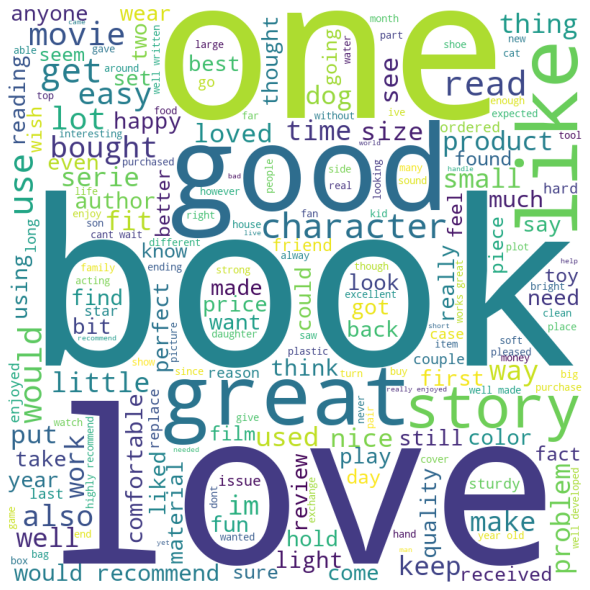

In [18]:
plot_word_cloud(reviews_df.text_no_punct)

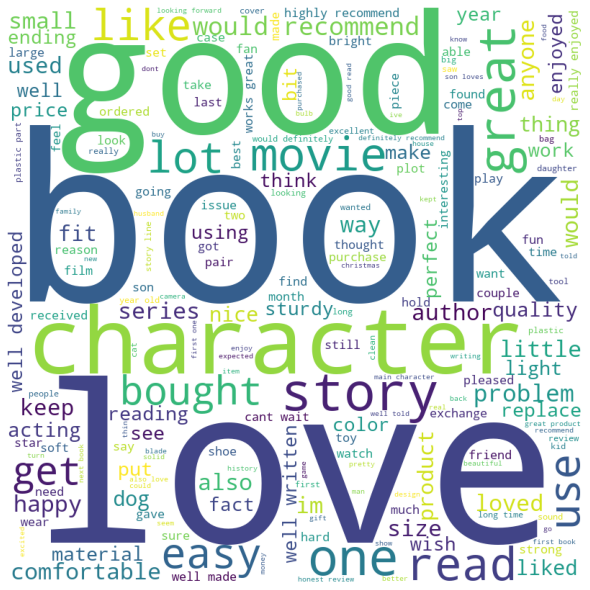

In [19]:
fake_reviews = cg_reviews.text_no_punct
plot_word_cloud(fake_reviews)

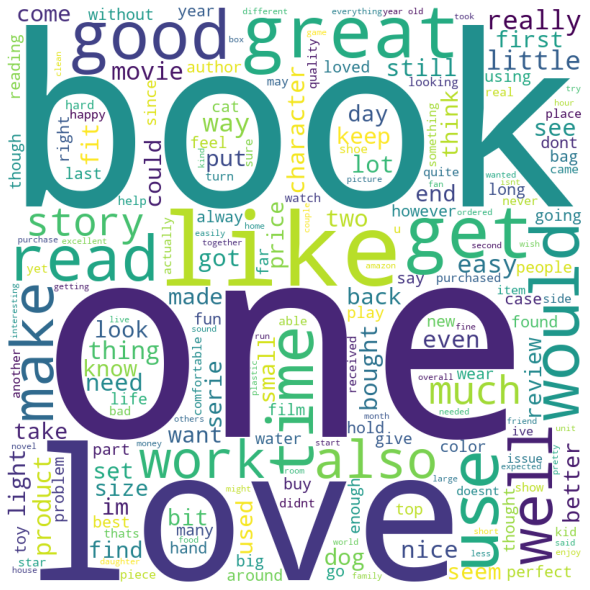

In [20]:
real_reviews = or_reviews.text_no_punct
plot_word_cloud(real_reviews)

#### Conclusions From Word Plots
We can see that, while they use similar words in general, there are a few words that have noticeably different appearance rates. Noteably, the word "one" appears far more frequently in real reviews than fake ones. We are hoping to use these dissimilarities to seperate our data with our model

In [21]:
# categorizes reviews based on overall sentiment
def get_sentiment(review):
    analysis = TextBlob(review)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

# Apply sentiment analysis
reviews_df['sentiment_category'] = reviews_df['text'].apply(get_sentiment)

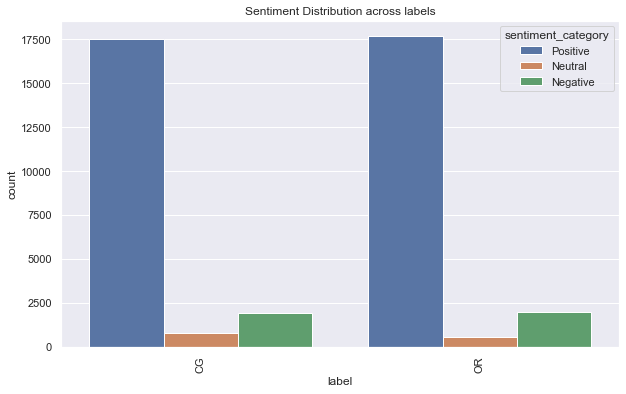

In [22]:
plt.figure(figsize=(10, 6))
sns.countplot(x='label', hue='sentiment_category', data=reviews_df)
plt.title('Sentiment Distribution across labels')
plt.xticks(rotation=90)
plt.show()

#### Conclusions from Bar Plot
Based on the barplot above, it seems that the fake reviews and real reviews have fairly similar distributions of overall sentiment. They are both heavily skewed towards positive sentiment.

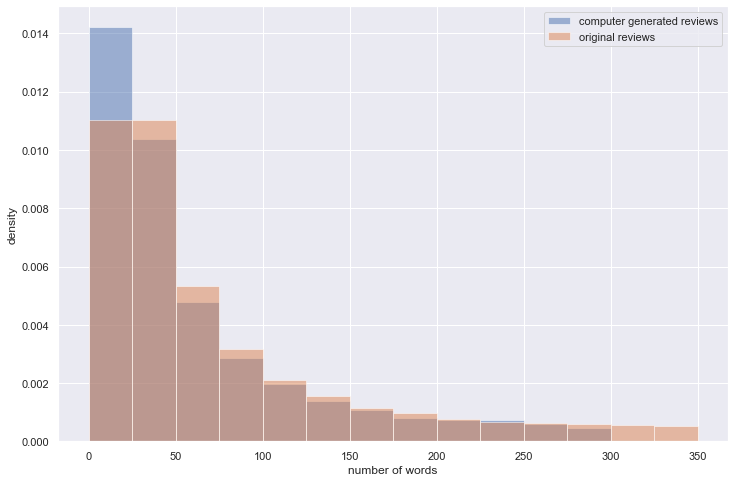

In [23]:
bins = np.arange(0, 375, 25)
plt.figure(figsize=(12, 8))
plt.hist(cg_reviews.num_words,
         label = 'computer generated reviews',
         alpha = 0.5,
         bins = bins,
         density=True)

plt.hist(or_reviews.num_words,
         label = 'original reviews',
         alpha = 0.5,
         bins = bins,
         density=True)

plt.legend()
plt.xlabel('number of words')
plt.ylabel('density')
plt.show()

#### Graph Explained
We find that there may be a difference in the distribution of review lengths for CG vs OR reviews, we confirm this with the KS test below

In [24]:
from scipy.stats import ks_2samp

print(f'Median num words (CG): {cg_reviews.num_words.median()}')
print(f'Median num words (OR): {or_reviews.num_words.median()}')
print()

#testing if original reviews have more words than computer generated reviews
res = ks_2samp(cg_reviews.num_words, or_reviews.num_words, alternative='greater')

print(f'Test Stat: {res[0]}')
print(f'P-value: {res[1]}')

Median num words (CG): 36.0
Median num words (OR): 43.0

Test Stat: 0.09131381084289672
P-value: 5.6671608178102464e-74


#### Kolmogorov-Smirnov Test Results for Number of Words
The extremely low p-value obtained from running a KS test on the distrubtions of the number of words in computer generated reviews and real reviews indicates that there is a statistically significant difference between the number of words in each type of review. The test tells us that we should reject the null hypothesis and believe the alternative. It appears that there are more words in real reviews than computer generated reviews.

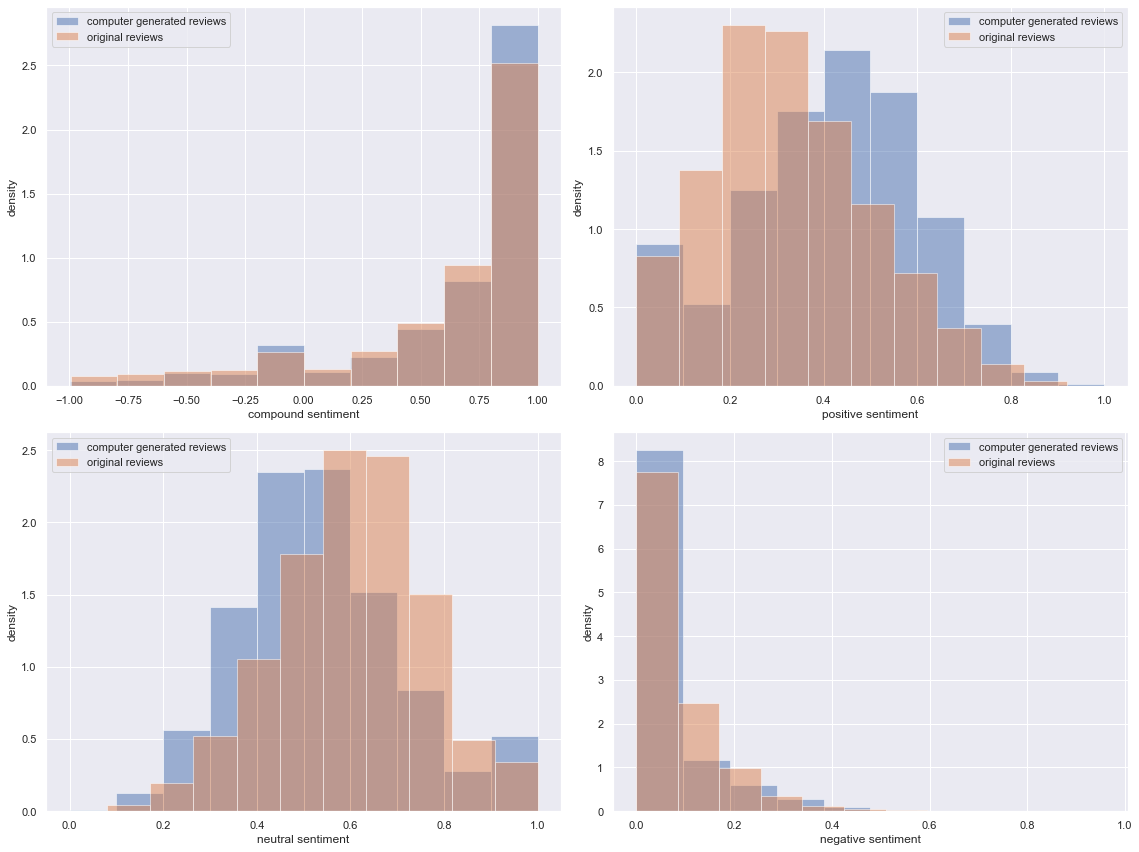

In [25]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

axes[0, 0].hist(cg_reviews.comp_sentiment, alpha=0.5, label='computer generated reviews', density=True)
axes[0, 0].hist(or_reviews.comp_sentiment, alpha=0.5, label='original reviews', density=True)
axes[0, 0].set_xlabel('compound sentiment')
axes[0, 0].set_ylabel('density')
axes[0, 0].legend()

axes[0, 1].hist(cg_reviews.pos_sentiment, alpha=0.5, label='computer generated reviews', density=True)
axes[0, 1].hist(or_reviews.pos_sentiment, alpha=0.5, label='original reviews', density=True)
axes[0, 1].set_xlabel('positive sentiment')
axes[0, 1].set_ylabel('density')
axes[0, 1].legend()

axes[1, 0].hist(cg_reviews.neu_sentiment, alpha=0.5, label='computer generated reviews', density=True)
axes[1, 0].hist(or_reviews.neu_sentiment, alpha=0.5, label='original reviews', density=True)
axes[1, 0].set_xlabel('neutral sentiment')
axes[1, 0].set_ylabel('density')
axes[1, 0].legend()

axes[1, 1].hist(cg_reviews.neg_sentiment, alpha=0.5, label='computer generated reviews', density=True)
axes[1, 1].hist(or_reviews.neg_sentiment, alpha=0.5, label='original reviews', density=True)
axes[1, 1].set_xlabel('negative sentiment')
axes[1, 1].set_ylabel('density')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

#### Kolmogorov-Smirnov Test for Compound Sentiment

In [26]:
print(f'Median compound sentiment (CG): {cg_reviews.comp_sentiment.median()}')
print(f'Median compound sentiment (OR): {or_reviews.comp_sentiment.median()}')
print()

#testing if computer-generated reviews have more compound sentiment than original reviews
res = ks_2samp(cg_reviews.comp_sentiment, or_reviews.comp_sentiment, alternative='less')

print(f'Test Stat: {res[0]}')
print(f'P-value: {res[1]}')

Median compound sentiment (CG): 0.8481
Median compound sentiment (OR): 0.802

Test Stat: 0.10551048674317365
P-value: 1.638793668989301e-98


#### Results for Compound Sentiment KS-Test
The extremely low p-value obtained from running a KS test on the distributions of compound sentiment between computer generated and real reviews indicates that there is a statistically significant difference between the compound sentiment in computer generated reviews and real reviews so we should reject the null hypothesis and instead believe the alternative. It appears that real reviews have lower compound sentiment than computer generated reviews. 

#### Two-Sample T-Test for Positive Sentiment

In [27]:
from scipy import stats

cg_pos = cg_reviews.pos_sentiment.values
or_pos = or_reviews.pos_sentiment.values

pos_t_val, pos_p_val = stats.ttest_ind(cg_pos, or_pos)

print(f'Test Stat: {pos_t_val}')
print(f'P-value: {pos_p_val}')

Test Stat: 43.35145021054243
P-value: 0.0


#### Results for Positive Sentiment T-Test
The extremely low p-value obtained from running a two sample t-test on the distributions of positive sentiment between computer generated and real reviews indicates that there is a statistically significant difference between the positive sentiment in computer generated reviews and real reviews so we should reject the null hypothesis and instead believe the alternative. It appears that real reviews have lower positive sentiment than computer generated reviews. 

#### Two-Sample T-Test for Neutral Sentiment

In [28]:
cg_neu = cg_reviews.neu_sentiment.values
or_neu = or_reviews.neu_sentiment.values

neu_t_val, neu_p_val = stats.ttest_ind(cg_neu, or_neu)

print(f'Test Stat: {neu_t_val}')
print(f'P-value: {neu_p_val}')

Test Stat: -38.29325680204358
P-value: 0.0


#### Results for Neutral Sentiment T-Test
The extremely low p-value obtained from running a two sample t-test on the distributions of neutral sentiment between computer generated and real reviews indicates that there is a statistically significant difference between the neutral sentiment in computer generated reviews and real reviews so we should reject the null hypothesis and instead believe the alternative. It appears that real reviews have greater neutral sentiment than computer generated reviews. 

#### Kolmogorov-Smirnov Test for Negative Sentiment

In [29]:
print(f'Median negative sentiment (CG): {cg_reviews.neg_sentiment.median()}')
print(f'Median negative sentiment (OR): {or_reviews.neg_sentiment.median()}')
print()

#testing if computer-generated reviews have less negative sentiment than original reviews
res = ks_2samp(cg_reviews.neg_sentiment, or_reviews.neg_sentiment, alternative='greater')

print(f'Test Stat: {res[0]}')
print(f'P-value: {res[1]}')

Median negative sentiment (CG): 0.0
Median negative sentiment (OR): 0.036

Test Stat: 0.16373169766521567
P-value: 3.6489190646592793e-236


#### Results for Negative Sentiment KS-Test
Once again, the extremely low p-value obtained from running a KS test on the distributions of negative sentiment between computer generated and real reviews indicates that there is a statistically significant difference between the negative sentiment in computer generated reviews and real reviews so we should reject the null hypothesis and instead believe the alternative. It appears that real reviews have greater negative sentiment than computer generated reviews. 

In [30]:
def plot_sentiment_by_rating(emotion):
    fig, axes = plt.subplots(1, 2, figsize=(16, 8))

    sns.boxplot(ax=axes[0], x='rating', y=f'{emotion}_sentiment', data=or_reviews)
    axes[0].set_title('OR Reviews')

    sns.boxplot(ax=axes[1], x='rating', y=f'{emotion}_sentiment', data=cg_reviews)
    axes[1].set_title('CG Reviews')

    plt.tight_layout()
    plt.show() 

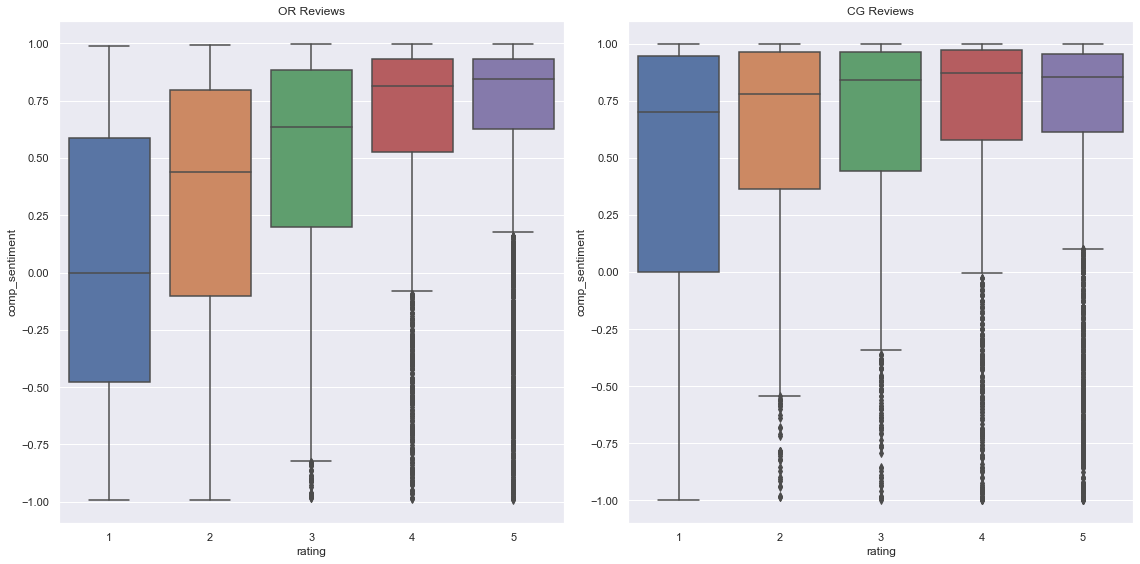

In [31]:
plot_sentiment_by_rating('comp')

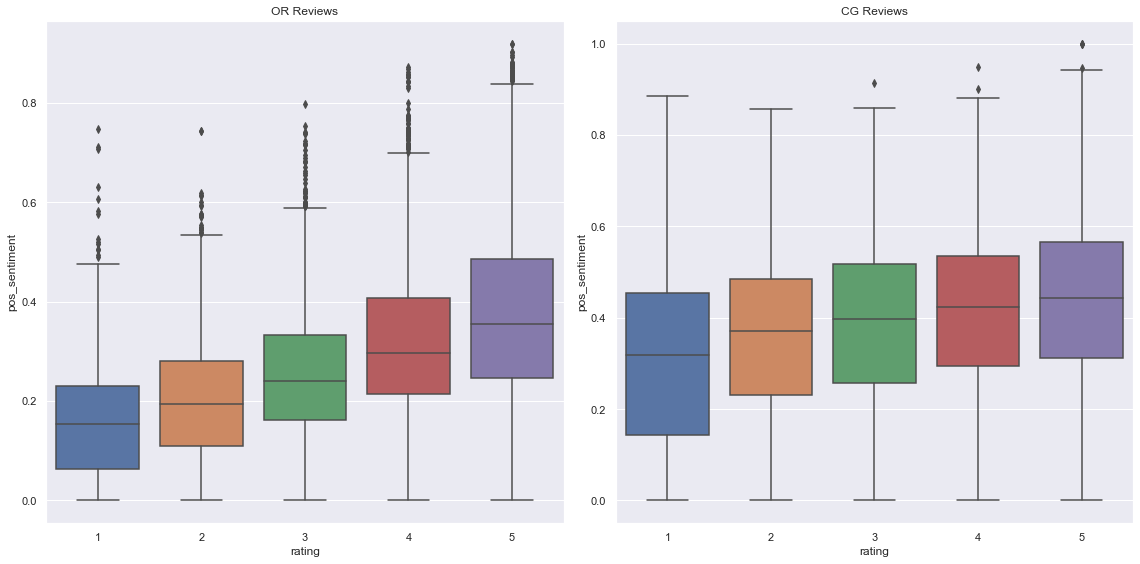

In [32]:
plot_sentiment_by_rating('pos')

####

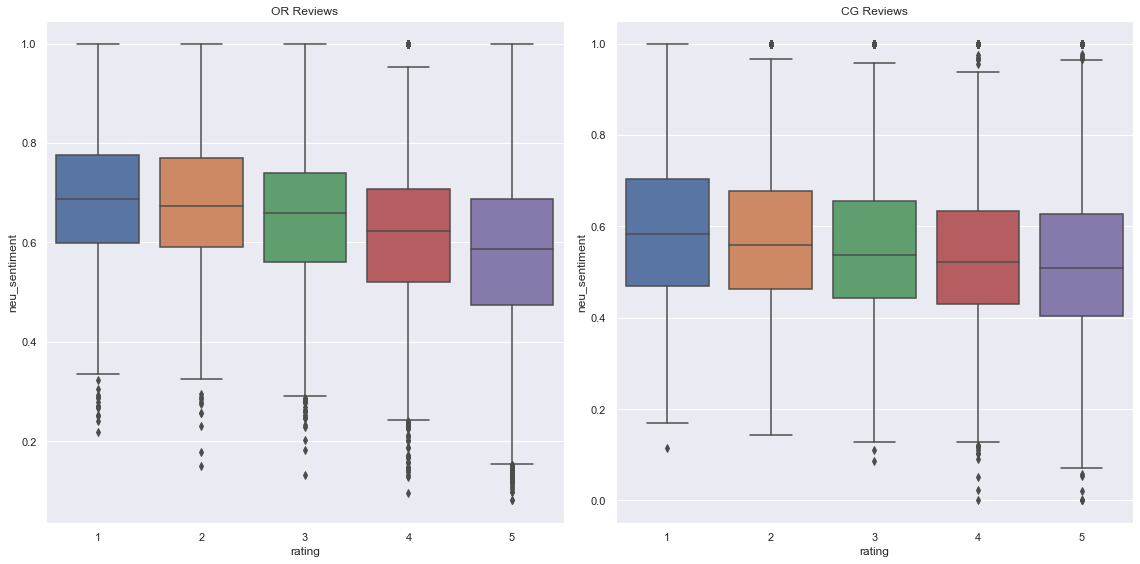

In [33]:
plot_sentiment_by_rating('neu')

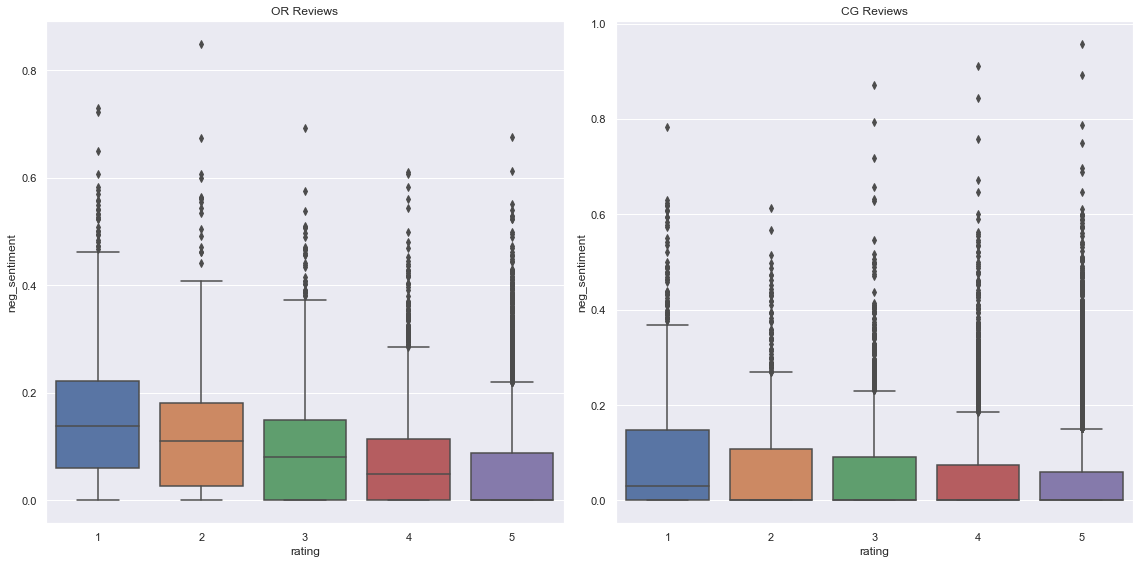

In [34]:
plot_sentiment_by_rating('neg')

#### Conclusion From Sentiment Exploration
We find that, as we suspected, the sentiment matches the review more closesly when the review is organic than computer generated.

#### Comparing Readability between Original and Computer Generated reviews

In [35]:
# Function to compute Flesch-Kincaid Grade Level
def compute_readability(review):
    return textstat.flesch_kincaid_grade(review)

# Apply the function to the 'review' column
reviews_df['readability'] = reviews_df['text'].apply(compute_readability)


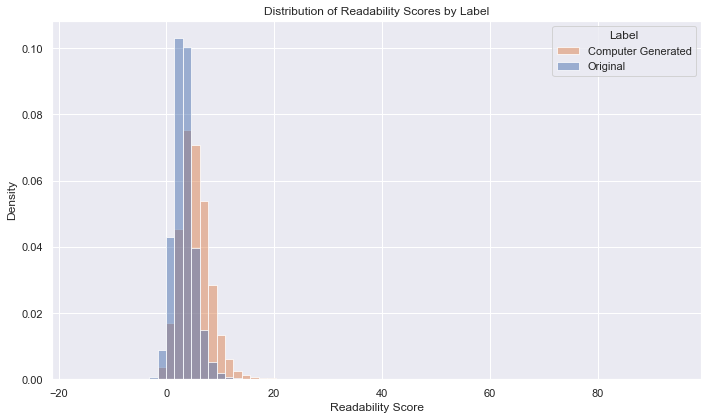

In [36]:
# Flesch-Kincaid Grade Level:
# 0-5: Very easy to read. Easily understood by an average 5th grader or younger.
# 6-8: Easy to read. Conversational English for consumers.
# 9-12: Fairly difficult to read. Plain English that is easily understood by an average 13 to 15-year-old student.
# 13-16: Difficult to read. Best understood by university graduates.
# 17+: Very difficult to read. Best understood by university graduates and above.

# plot shows distrbution of readiability scores based on wheter a lable is computer generated or human generated
plt.figure(figsize=(10, 6))
sns.histplot(reviews_df, x = 'readability', hue = 'label', bins = 70, element = 'bars', stat ='density')
plt.title('Distribution of Readability Scores by Label')
plt.xlabel('Readability Score')
plt.ylabel('Density')
plt.legend(title = 'Label', labels = ['Computer Generated', 'Original'])
plt.grid(True)
plt.tight_layout()
plt.show()

#### Explanation of this histogram
Here we can see a clear difference in the readabiltiy scores of Computer Generated vs Organic Reviews. Below we perform a two sample T test to confirm that the means are different.

#### Two-Sample T-Test for Readability between CG and OR reviews

In [37]:
cg_read = reviews_df[reviews_df['label'] == 'CG']['readability'].values
or_read = reviews_df[reviews_df['label'] == 'OR']['readability'].values

read_t_val, read_p_val = stats.ttest_ind(cg_read, or_read)

print(f'Test Stat: {read_t_val}')
print(f'P-value: {read_p_val}')

Test Stat: -67.0586138821249
P-value: 0.0


#### Results for Readability between CG and OR reviews T-Test

The extremely low p-value obtained from running a two sample t-test on the distributions of readabilty between computer generated and real reviews indicates that there is a statistically significant difference between the readability in computer generated reviews and real reviews so we should reject the null hypothesis and instead believe the alternative. It appears that real reviews have greater readability than computer generated reviews. 

### Section 3 of EDA - Initial Models

In [39]:
## bag of words model 

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(reviews_df['text_no_punct'])

X_train, X_test, y_train, y_test = train_test_split(X, reviews_df['label'], test_size=0.2, random_state=42)
clf = MultinomialNB()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8606405341906764


In [40]:
# TFIDF model
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
X = tfidf.fit_transform(reviews_df['text_no_punct'])

X_train, X_test, y_train, y_test = train_test_split(X, reviews_df['label'], test_size=0.2, random_state=42)

naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, y_train)

y_pred = naive_bayes.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8712748856188945


# Ethics & Privacy

Classifying fake reviews can be ethically challenging. The case of a false positive is particularly damaging. For example, if our model errs and marks a true review fake, most people would simply discard that information, thereby invalidating the poster’s speech. Furthermore, websites might delete this review, completely preventing someone from sharing their opinion. This is something that we can account for in our model metrics by valuing precision more than recall. However, we cannot fully eliminate this possibility so we would address this issue directly in our results analysis.

For ethical concerns of our data source, biases in the data could greatly impact our results. For example, if the curator was biased in their data collection, drawing fake reviews from a subset of products more often than others, producers could be adversely affected by our model’s bias. This is something that we would try to ascertain in our EDA stage, and we would address this thoroughly before any statements on our results. Moreover, certain word choices may be penalized heavier than others, which could unduly target geo/cultural groups. To determine this we would have to audit our model. Additionally, there is a privacy concern with the data collection process, as our data will likely be scraped, data consent may be an issue we encounter. This is of utmost importance, thus we must ensure ethically sourced data prior to any model construction.

# Team Expectations 

As a group, our main focus is to all contribute our fair share of what is expected from each other every time we meet up. It is important that each team member is held accountable for their responsibilities so that the group can progress towards our project goals and deadlines. All group members should be included in all communication made regarding the project so that nobody is felt left out or lost. It is also important to have respect and understanding of any extraneous circumstances that may cause someone to not be able to fulfill their duties. In all, it boils down to everyone doing their honest work to the best of their ability, staying up to date with communication on project updates, being involved in discussion, showing up to meetings, and being respectful of one another.

Throughout the quarter, we have multiple places of communication from text messaging, discord, and email. Text messaging is primarily used for communication regarding when to meet, keeping each other updated, and any general information about the project. Discord and email is used to share information amongst each other regarding project materials, links, and more technical planning information. In all communication, it is important to be open-minded and respectful of other team members' inputs and ideas. Responses regarding disagreements should be dealt with respectfully and not in a rash, harsh manner. Should this happen, group members will need to meet up in person and find a solution together. It is also important to express to the group if you need help with something instead of just struggling by yourself. Also, going above and beyond on project items is each member’s choice, ability, and hard work.

# Project Timeline Proposal

| Meeting Date  | Meeting Time| Completed Before Meeting  | Discuss at Meeting |
|---|---|---|---|
| 5/7  |  2 PM | Brainstorm where we can find the data that we need. Come up with at least one dataset that you think could be helpful (Everyone)  | Finalize dataset and distribute work for EDA/feature engineering | 
| 5/14  |  2 pm | Some sort of EDA/feature engineering, does not have to be 100% done but need to have some progress (Vrisan, Caleb, Nilay)  | Work on finishing the data checkpoint and figure out ways to continue EDA/feature engineering. Discussed potential models like Naive Bayes and features like bag of words and sentiment analysis to help us. | 
| 5/21  | 2 pm  | EDA and feature engineering is 90% finished. (Vikram, Liam)  | Discuss what types of models that we would like to use. Figure out a baseline model. Go over most important EDA to put on project. Possibly identify the best features to use in model and why they are the best. |
| 5/28  | 2 PM  | EDA and feature engineering is 100% done. Baseline model is done with some type of results to show. Accuracy does not have to be great at all but just needs to be established as a baseline (Nilay, Caleb) | Work on finishing the EDA checkpoint and brainstorm and then finalize options for final model   |
| 6/7  | 2 PM  | Final Model and any hyperparameter tuning is done. Final results have been obtained (Everyone) | Start working on the video presentation and final notebook  |
| 6/14  | 2 PM  | Final notebook is 95% done and almost ready to be submitted (Everyone) | Record final version of the video and finalize the submitted notebook |